# Calculate porportions
## By Svajune Klimasauskaite

In [127]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from mpl_toolkits import mplot3d
import datetime as dt
from pandas import DataFrame as df

%matplotlib inline

## Load Data



### Population - Permantent residents

In [128]:
#Load and change the column names, to prepare for the further data merge
df1=pd.read_csv("../Datasets/LT_gyventoju_skaicius.csv", sep=';')
df1.head()
df1['Gyvenamoji vietovė'].unique()

array(['Miestas ir kaimas'], dtype=object)

### Population - Age by women

In [129]:
#Load and change the column names, to prepare for the further data merge
df2=pd.read_csv("../Datasets/LT_demography_women_1000_men.csv", sep=';')
# Move categories to the columns,in order not to change level of details
df2.head(2)

,Laikotarpis,Rodiklis,Administracinė teritorija,Amžius,Matavimo vienetai,Reikšmė
0,1996,"Moterų skaičius, tenkantis 1 tūkst. vyrų, metų...",Elektrėnų sav.,Iš viso pagal amžių,asmenys,NaN
1,1997,"Moterų skaičius, tenkantis 1 tūkst. vyrų, metų...",Elektrėnų sav.,Iš viso pagal amžių,asmenys,NaN


In [130]:
df21 = df2.copy()
df_merged = pd.merge(df1, df21, how='inner', on=['Laikotarpis','Administracinė teritorija'])
df_merged.head(2)

,Laikotarpis,Rodiklis_x,Administracinė teritorija,Gyvenamoji vietovė,Matavimo vienetai_x,Reikšmė_x,Rodiklis_y,Amžius,Matavimo vienetai_y,Reikšmė_y
0,1996,Nuolatinių gyventojų skaičius metų pradžioje,Elektrėnų sav.,Miestas ir kaimas,asmenys,30410.0,"Moterų skaičius, tenkantis 1 tūkst. vyrų, metų...",Iš viso pagal amžių,asmenys,NaN
1,1996,Nuolatinių gyventojų skaičius metų pradžioje,Elektrėnų sav.,Miestas ir kaimas,asmenys,30410.0,"Moterų skaičius, tenkantis 1 tūkst. vyrų, metų...",0–4,asmenys,NaN


In [131]:
df_merged.drop(columns = ['Rodiklis_x','Gyvenamoji vietovė','Matavimo vienetai_x','Rodiklis_y',
                   'Matavimo vienetai_y'], inplace=True)
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,Reikšmė_x,Amžius,Reikšmė_y
0,1996,Elektrėnų sav.,30410.0,Iš viso pagal amžių,NaN
1,1996,Elektrėnų sav.,30410.0,0–4,NaN


In [132]:
df_merged.rename(columns={'Reikšmė_x':'population','Reikšmė_y':'women'}, inplace=True)
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,population,Amžius,women
0,1996,Elektrėnų sav.,30410.0,Iš viso pagal amžių,NaN
1,1996,Elektrėnų sav.,30410.0,0–4,NaN


In [133]:
df_merged.dropna(axis = 0, inplace=True)
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,population,Amžius,women
85,2001,Elektrėnų sav.,28976.0,Iš viso pagal amžių,1085.0
86,2001,Elektrėnų sav.,28976.0,0–4,950.0


In [156]:
df_merged['women'] = df_merged['women'].astype(int)

In [159]:
df_merged['proportion'] = df_merged['women']/1000/2
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men
85,2001,Elektrėnų sav.,28976.0,Iš viso pagal amžių,1085,0.5425,7811.502304,21164.497696
86,2001,Elektrėnų sav.,28976.0,0–4,950,0.4750,6862.736842,22113.263158


In [160]:
df_merged[df_merged['Administracinė teritorija'] == 'Kaišiadorių r. sav.']

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men
6205,2001,Kaišiadorių r. sav.,37632.0,Iš viso pagal amžių,1025,0.5125,9637.463415,27994.536585
6206,2001,Kaišiadorių r. sav.,37632.0,0–4,996,0.4980,9370.216867,28261.783133
6207,2001,Kaišiadorių r. sav.,37632.0,5–9,1043,0.5215,9795.865772,27836.134228
6208,2001,Kaišiadorių r. sav.,37632.0,10–14,966,0.4830,9076.869565,28555.130435
6209,2001,Kaišiadorių r. sav.,37632.0,15–19,814,0.4070,7258.260442,30373.739558
6210,2001,Kaišiadorių r. sav.,37632.0,20–24,562,0.2810,2075.786477,35556.213523
6211,2001,Kaišiadorių r. sav.,37632.0,25–29,761,0.3805,6453.319317,31178.680683
6212,2001,Kaišiadorių r. sav.,37632.0,30–34,864,0.4320,7927.111111,29704.888889
6213,2001,Kaišiadorių r. sav.,37632.0,35–39,820,0.4100,7342.829268,30289.170732
6214,2001,Kaišiadorių r. sav.,37632.0,40–44,949,0.4745,8902.406744,28729.593256


In [161]:
df_merged['population_women'] = df_merged['population']*df_merged['proportion']
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men
85,2001,Elektrėnų sav.,28976.0,Iš viso pagal amžių,1085,0.5425,15719.48,21164.497696
86,2001,Elektrėnų sav.,28976.0,0–4,950,0.4750,13763.60,22113.263158


In [162]:
df_merged['population_men'] = df_merged['population']-df_merged['population_women']
df_merged.head(2)

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men
85,2001,Elektrėnų sav.,28976.0,Iš viso pagal amžių,1085,0.5425,15719.48,13256.52
86,2001,Elektrėnų sav.,28976.0,0–4,950,0.4750,13763.60,15212.40


## Issaugoti 

In [163]:
new=df_merged.copy()
#new.drop_duplicates(subset = ['Laikotarpis', 'Administracinė teritorija'], inplace=True)
new.head()

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men
85,2001,Elektrėnų sav.,28976.0,Iš viso pagal amžių,1085,0.5425,15719.480,13256.520
86,2001,Elektrėnų sav.,28976.0,0–4,950,0.4750,13763.600,15212.400
87,2001,Elektrėnų sav.,28976.0,5–9,931,0.4655,13488.328,15487.672
88,2001,Elektrėnų sav.,28976.0,10–14,903,0.4515,13082.664,15893.336
89,2001,Elektrėnų sav.,28976.0,15–19,901,0.4505,13053.688,15922.312


In [164]:
df.to_csv(new, '../Datasets/⁨LT_population_gender_split.csv', sep=';')

### Age distribution

In [175]:
df_merged['Administracinė teritorija'].unique()

array(['Elektrėnų sav.', 'Šalčininkų r. sav.', 'Širvintų r. sav.',
       'Švenčionių r. sav.', 'Trakų r. sav.', 'Ukmergės r. sav.',
       'Vilniaus m. sav.', 'Vilniaus r. sav.', 'Alytaus m. sav.',
       'Alytaus r. sav.', 'Druskininkų sav.', 'Lazdijų r. sav.',
       'Varėnos r. sav.', 'Birštono sav.', 'Jonavos r. sav.',
       'Kaišiadorių r. sav.', 'Kauno m. sav.', 'Kauno r. sav.',
       'Kėdainių r. sav.', 'Prienų r. sav.', 'Raseinių r. sav.',
       'Klaipėdos m. sav.', 'Klaipėdos r. sav.', 'Kretingos r. sav.',
       'Neringos sav.', 'Palangos m. sav.', 'Skuodo r. sav.',
       'Šilutės r. sav.', 'Kalvarijos sav.', 'Kazlų Rūdos sav.',
       'Marijampolės sav.', 'Šakių r. sav.', 'Vilkaviškio r. sav.',
       'Biržų r. sav.', 'Kupiškio r. sav.', 'Panevėžio m. sav.',
       'Panevėžio r. sav.', 'Pasvalio r. sav.', 'Rokiškio r. sav.',
       'Akmenės r. sav.', 'Joniškio r. sav.', 'Kelmės r. sav.',
       'Pakruojo r. sav.', 'Radviliškio r. sav.', 'Šiaulių m. sav.',
       'Šiauli

In [176]:
df_merged[df_merged['Administracinė teritorija'] == 'Kaišiadorių r. sav.']



,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men,possibility,group,men_proportion,group_men,age_woman,age_men
6205,2001,Kaišiadorių r. sav.,37632.0,Iš viso pagal amžių,1025,0.5125,19286.4000,18345.6000,0.0625,0.032031,0.4875,0.030469,1205.400000,1146.600000
6206,2001,Kaišiadorių r. sav.,37632.0,0–4,996,0.4980,18740.7360,18891.2640,0.0625,0.031125,0.5020,0.031375,1171.296000,1180.704000
6207,2001,Kaišiadorių r. sav.,37632.0,5–9,1043,0.5215,19625.0880,18006.9120,0.0625,0.032594,0.4785,0.029906,1226.568000,1125.432000
6208,2001,Kaišiadorių r. sav.,37632.0,10–14,966,0.4830,18176.2560,19455.7440,0.0625,0.030187,0.5170,0.032313,1136.016000,1215.984000
6209,2001,Kaišiadorių r. sav.,37632.0,15–19,814,0.4070,15316.2240,22315.7760,0.0625,0.025437,0.5930,0.037062,957.264000,1394.736000
6210,2001,Kaišiadorių r. sav.,37632.0,20–24,562,0.2810,10574.5920,27057.4080,0.0625,0.017563,0.7190,0.044937,660.912000,1691.088000
6211,2001,Kaišiadorių r. sav.,37632.0,25–29,761,0.3805,14318.9760,23313.0240,0.0625,0.023781,0.6195,0.038719,894.936000,1457.064000
6212,2001,Kaišiadorių r. sav.,37632.0,30–34,864,0.4320,16257.0240,21374.9760,0.0625,0.027000,0.5680,0.035500,1016.064000,1335.936000
6213,2001,Kaišiadorių r. sav.,37632.0,35–39,820,0.4100,15429.1200,22202.8800,0.0625,0.025625,0.5900,0.036875,964.320000,1387.680000
6214,2001,Kaišiadorių r. sav.,37632.0,40–44,949,0.4745,17856.3840,19775.6160,0.0625,0.029656,0.5255,0.032844,1116.024000,1235.976000


In [177]:
df_merged['possibility']=1/16
df_merged['group'] = df_merged['possibility']*df_merged['proportion']

df_merged['men_proportion'] = abs(df_merged['proportion']-1)
df_merged['group_men'] = df_merged['possibility']*df_merged['men_proportion']



df_merged['age_woman'] = df_merged['group']*df_merged['population']
df_merged['age_men'] = df_merged['group_men']*df_merged['population']


df_merged.tail(20)

,Laikotarpis,Administracinė teritorija,population,Amžius,women,proportion,population_women,population_men,possibility,group,men_proportion,group_men,age_woman,age_men
24868,2018,Zarasų r. sav.,15668.0,65–69,1545,0.7725,12103.530,3564.470,0.0625,0.048281,0.2275,0.014219,756.470625,222.779375
24869,2018,Zarasų r. sav.,15668.0,70–74,1607,0.8035,12589.238,3078.762,0.0625,0.050219,0.1965,0.012281,786.827375,192.422625
24870,2018,Zarasų r. sav.,15668.0,75 ir vyresni,2614,1.3070,20478.076,-4810.076,0.0625,0.081687,0.3070,0.019187,1279.879750,300.629750
24871,2019,Zarasų r. sav.,15274.0,Iš viso pagal amžių,1153,0.5765,8805.461,6468.539,0.0625,0.036031,0.4235,0.026469,550.341312,404.283687
24872,2019,Zarasų r. sav.,15274.0,0–4,1068,0.5340,8156.316,7117.684,0.0625,0.033375,0.4660,0.029125,509.769750,444.855250
24873,2019,Zarasų r. sav.,15274.0,5–9,865,0.4325,6606.005,8667.995,0.0625,0.027031,0.5675,0.035469,412.875313,541.749688
24874,2019,Zarasų r. sav.,15274.0,10–14,944,0.4720,7209.328,8064.672,0.0625,0.029500,0.5280,0.033000,450.583000,504.042000
24875,2019,Zarasų r. sav.,15274.0,15–19,970,0.4850,7407.890,7866.110,0.0625,0.030312,0.5150,0.032188,462.993125,491.631875
24876,2019,Zarasų r. sav.,15274.0,20–24,938,0.4690,7163.506,8110.494,0.0625,0.029312,0.5310,0.033188,447.719125,506.905875
24877,2019,Zarasų r. sav.,15274.0,25–29,871,0.4355,6651.827,8622.173,0.0625,0.027219,0.5645,0.035281,415.739188,538.885813


In [178]:
df.to_csv(df_merged, '../Datasets/⁨LT_age_gender_split.csv', sep=';')

In [93]:
new2=df_merged.copy()
a=new2[new2['Amžius']=='Iš viso pagal amžių'].groupby(['Laikotarpis','Administracinė teritorija'])['population_women'].sum()
a.head(20)

Laikotarpis  Administracinė teritorija
2001         Akmenės r. sav.               16814.444444
             Alytaus m. sav.               38315.287570
             Alytaus r. sav.               16889.173745
             Anykščių r. sav.              19610.654288
             Birštono sav.                  3123.526091
             Biržų r. sav.                 19777.007972
             Druskininkų sav.              14593.242087
             Elektrėnų sav.                15623.004608
             Ignalinos r. sav.             12676.435252
             Jonavos r. sav.               28990.858415
             Joniškio r. sav.              17819.752431
             Jurbarko r. sav.              20816.114106
             Kaišiadorių r. sav.           19274.926829
             Kalvarijos sav.                7515.915441
             Kauno m. sav.                223319.673806
             Kauno r. sav.                 44882.865471
             Kazlų Rūdos sav.               8194.830325
         

In [94]:
a = pd.DataFrame(a)

In [95]:
df.to_csv(a, '../Datasets/⁨aaaa.csv', sep=';')

In [96]:
b=pd.read_csv("../Datasets/bbbb.csv", sep=';')
b.head(20)

,Laikotarpis,Administracinė teritorija,population_women
0,2001,Akmenės r. sav.,16814.444444
1,2001,Alytaus m. sav.,38315.287570
2,2001,Alytaus r. sav.,16889.173745
3,2001,Anykščių r. sav.,19610.654288
4,2001,Birštono sav.,3123.526091
5,2001,Biržų r. sav.,19777.007972
6,2001,Druskininkų sav.,14593.242087
7,2001,Elektrėnų sav.,15623.004608
8,2001,Ignalinos r. sav.,12676.435252
9,2001,Jonavos r. sav.,28990.858415


In [98]:
aa = pd.merge(b, df_merged, how='inner', on=['Laikotarpis','Administracinė teritorija'])
aa.head()


,Laikotarpis,Administracinė teritorija,population_women_x,population,Amžius,women,proportion,population_women_y,population_men,possibility,group,age_woman
0,2001,Akmenės r. sav.,16814.444444,30266.0,Iš viso pagal amžių,1125.0,0.555556,16814.444444,13451.555556,0.0625,0.034722,1050.902778
1,2001,Akmenės r. sav.,16814.444444,30266.0,0–4,881.0,0.432463,13088.928490,17177.071510,0.0625,0.027029,818.058031
2,2001,Akmenės r. sav.,16814.444444,30266.0,5–9,926.0,0.460043,13923.667387,16342.332613,0.0625,0.028753,870.229212
3,2001,Akmenės r. sav.,16814.444444,30266.0,10–14,957.0,0.477534,14453.042842,15812.957158,0.0625,0.029846,903.315178
4,2001,Akmenės r. sav.,16814.444444,30266.0,15–19,956.0,0.476987,14436.502092,15829.497908,0.0625,0.029812,902.281381


In [70]:
aaaa['Prop_age_women'] = aaaa['women_x']*aaaa['proportion']
aaaa['Prop_men'] = 2-aaaa['proportion']
aaaa['Prop_age_men'] = 1000*aaaa['Prop_men']
aaaa.head(20)

,Laikotarpis,Administracinė teritorija,women_x,population,Amžius,women_y,proportion,population_women,population_men,Prop_age_women,Prop_age_men,Prop_men
0,2001,Akmenės r. sav.,1125.0,30266.0,Iš viso pagal amžių,1125.0,1.125,17024.625,13241.375,1265.625,875.0,0.875
1,2001,Akmenės r. sav.,1125.0,30266.0,0–4,881.0,0.881,13332.173,16933.827,991.125,1119.0,1.119
2,2001,Akmenės r. sav.,1125.0,30266.0,5–9,926.0,0.926,14013.158,16252.842,1041.750,1074.0,1.074
3,2001,Akmenės r. sav.,1125.0,30266.0,10–14,957.0,0.957,14482.281,15783.719,1076.625,1043.0,1.043
4,2001,Akmenės r. sav.,1125.0,30266.0,15–19,956.0,0.956,14467.148,15798.852,1075.500,1044.0,1.044
5,2001,Akmenės r. sav.,1125.0,30266.0,20–24,917.0,0.917,13876.961,16389.039,1031.625,1083.0,1.083
6,2001,Akmenės r. sav.,1125.0,30266.0,25–29,1011.0,1.011,15299.463,14966.537,1137.375,989.0,0.989
7,2001,Akmenės r. sav.,1125.0,30266.0,30–34,1017.0,1.017,15390.261,14875.739,1144.125,983.0,0.983
8,2001,Akmenės r. sav.,1125.0,30266.0,35–39,991.0,0.991,14996.803,15269.197,1114.875,1009.0,1.009
9,2001,Akmenės r. sav.,1125.0,30266.0,40–44,1071.0,1.071,16207.443,14058.557,1204.875,929.0,0.929


In [71]:
df.to_csv(aaaa, '../Datasets/⁨dddd.csv', sep=';')

In [53]:
aaaa['Prop_age_women'] = aaaa['population_women']*aaaa['Prop_age']
aaaa.head(20)

,Laikotarpis,Administracinė teritorija,women_x,population,Amžius,women_y,proportion,population_women,population_men,Prop_age,Prop_age_women
0,2001,Akmenės r. sav.,19420.0,30266.0,Iš viso pagal amžių,1125.0,1.125,17024.625,13241.375,0.057930,986.236000
1,2001,Akmenės r. sav.,19420.0,30266.0,0–4,881.0,0.881,13332.173,16933.827,0.045366,604.822060
2,2001,Akmenės r. sav.,19420.0,30266.0,5–9,926.0,0.926,14013.158,16252.842,0.047683,668.186628
3,2001,Akmenės r. sav.,19420.0,30266.0,10–14,957.0,0.957,14482.281,15783.719,0.049279,713.673683
4,2001,Akmenės r. sav.,19420.0,30266.0,15–19,956.0,0.956,14467.148,15798.852,0.049228,712.182981
5,2001,Akmenės r. sav.,19420.0,30266.0,20–24,917.0,0.917,13876.961,16389.039,0.047219,655.261238
6,2001,Akmenės r. sav.,19420.0,30266.0,25–29,1011.0,1.011,15299.463,14966.537,0.052060,796.485947
7,2001,Akmenės r. sav.,19420.0,30266.0,30–34,1017.0,1.017,15390.261,14875.739,0.052369,805.967839
8,2001,Akmenės r. sav.,19420.0,30266.0,35–39,991.0,0.991,14996.803,15269.197,0.051030,765.284849
9,2001,Akmenės r. sav.,19420.0,30266.0,40–44,1071.0,1.071,16207.443,14058.557,0.055149,893.829632


In [4]:
# Fill category values into a separate list
data1 = []
data2 = []
for index, row in df2.iterrows():
    if row['Lytis_Moterys']==1:
        data1.append(row['Reikšmė'])
    elif row['Lytis_Vyrai']==1:
        data2.append(row['Reikšmė'])

In [5]:
# Remove duplicates and keep municipalities as the lowest level of details
df2.drop_duplicates(subset = ['Laikotarpis', 'Administracinė teritorija'], inplace=True)
df2.drop(columns = ['Reikšmė','Matavimo vienetai'], inplace=True)

In [6]:
# add categories lists to the DataFrame
df2['Lytis_Moterys'] = data1
df2['Lytis_Vyrai'] = data2
df2.head()

,Laikotarpis,median_age,Administracinė teritorija,Lytis_Moterys,Lytis_Vyrai
0,2001,Medianinis gyventojų amžius metų pradžioje,Elektrėnų sav.,38.0,34.0
1,2002,Medianinis gyventojų amžius metų pradžioje,Elektrėnų sav.,39.0,34.0
2,2003,Medianinis gyventojų amžius metų pradžioje,Elektrėnų sav.,40.0,35.0
3,2004,Medianinis gyventojų amžius metų pradžioje,Elektrėnų sav.,40.0,35.0
4,2005,Medianinis gyventojų amžius metų pradžioje,Elektrėnų sav.,41.0,36.0


### Teritory - Population Density

In [7]:
#Load and change the column names, to prepare for the further data merge
df4=pd.read_csv("../Dataset_raw/Lithuania/gyventoju_tankis.csv", sep=';')
# Align column names
df4.rename(columns={'Rodiklis':'population_density','Reikšmė':'population_density_value',
                   'Matavimo vienetai':'population_density_measure'}, inplace=True)
df4.head(2)

,Laikotarpis,population_density,Administracinė teritorija,population_density_measure,population_density_value
0,2001,Gyventojų tankis metų pradžioje,Elektrėnų sav.,viename km²,53.9
1,2002,Gyventojų tankis metų pradžioje,Elektrėnų sav.,viename km²,53.1


### Flats - Useful Area

In [8]:
#Load and change the column names, to prepare for the further data merge
df5=pd.read_csv("../Dataset_raw/Lithuania/naudingas_plotas.csv", sep=';')
# Align column names
df5.rename(columns={'Rodiklis':'useful_area', 'Reikšmė':'useful_area_value', 
                    'Matavimo vienetai':'useful_area_measure'}, inplace=True)
# Drop unnecessary columns
df5.drop(columns = ['Gyvenamoji vietovė'], inplace=True)
df5.tail()

,Laikotarpis,useful_area,Administracinė teritorija,useful_area_measure,useful_area_value
1745,2014,"Naudingasis plotas, tenkantis vienam gyventojui",Zarasų r. sav.,m²,40.3
1746,2015,"Naudingasis plotas, tenkantis vienam gyventojui",Zarasų r. sav.,m²,41.4
1747,2016,"Naudingasis plotas, tenkantis vienam gyventojui",Zarasų r. sav.,m²,42.8
1748,2017,"Naudingasis plotas, tenkantis vienam gyventojui",Zarasų r. sav.,m²,44.1
1749,2018,"Naudingasis plotas, tenkantis vienam gyventojui",Zarasų r. sav.,m²,45.3


### Flats - Average dwelling

In [9]:
#Load and change the column names, to prepare for the further data merge
df6=pd.read_csv("../Dataset_raw/Lithuania/buto_dydis.csv", sep=';')
# Align column names
df6.rename(columns={'Rodiklis':'average_housing','Reikšmė':'average_housing_value',
                   'Matavimo vienetai':'average_housing_measure'}, inplace=True)
# Drop unnecessary columns
df6.drop(columns = ['Gyvenamoji vietovė'], inplace=True)
df6.head(2)

,Laikotarpis,average_housing,Administracinė teritorija,average_housing_measure,average_housing_value
0,2001.0,Vidutinis būsto dydis,Elektrėnų sav.,m²,57.7
1,2002.0,Vidutinis būsto dydis,Elektrėnų sav.,m²,57.7


### Economy - Neto Imigration

In [10]:
#Load and change the column names, to prepare for the further data merge
df8=pd.read_csv("../Dataset_raw/Lithuania/imigrantai.csv", sep=';')
# Align column names
df8.rename(columns={'Rodiklis':'neto_migration','Reikšmė':'neto_migration_value',
                   'Matavimo vienetai':'neto_migration_measure'}, inplace=True)
df8.tail(2)

,Laikotarpis,neto_migration,Administracinė teritorija,neto_migration_measure,neto_migration_value
1767,2017,Neto migracija,Zarasų r. sav.,asmenys,-284.0
1768,2018,Neto migracija,Zarasų r. sav.,asmenys,-193.0


### Economy - Unemployment

In [11]:
#Load and change the column names, to prepare for the further data merge
df9=pd.read_csv("../Dataset_raw/Lithuania/bedarbiai.csv", sep=';')
# Align column names
df9.rename(columns={'Rodiklis':'unemployment','Reikšmė':'unemployment_value',
                   'Matavimo vienetai':'unemployment_measure'}, inplace=True)
df9.tail(2)

,Laikotarpis,unemployment,Administracinė teritorija,unemployment_measure,unemployment_value
1572,2017,Registruotų bedarbių ir darbingo amžiaus gyven...,Zarasų r. sav.,proc.,14.0
1573,2018,Registruotų bedarbių ir darbingo amžiaus gyven...,Zarasų r. sav.,proc.,14.9


### Hierarchy

In [12]:
#Load LT district and municipality hierarchy 
df10=pd.read_csv("../Dataset_raw/Hierarchies/LT_hierarchy.csv", sep=';')
df10.head(2)

,country,area,district,municipality
0,Lietuvos Respublika,Sostinės regionas,Vilniaus apskritis,Elektrėnų sav.
1,Lietuvos Respublika,Sostinės regionas,Vilniaus apskritis,Šalčininkų r. sav.


## Merge

Merge all datasets on the **period** and **municipality**.

In [13]:
# Merge all dataframes on the period and municipality

all_data = pd.merge(df1, df2, how='outer', on=['Laikotarpis','Administracinė teritorija'])
all_data = pd.merge(all_data, df4, how='inner', on=['Laikotarpis','Administracinė teritorija'])
all_data = pd.merge(all_data, df5, how='inner', on=['Laikotarpis','Administracinė teritorija'])
all_data = pd.merge(all_data, df6, how='inner', on=['Laikotarpis','Administracinė teritorija'])
all_data = pd.merge(all_data, df8, how='inner', on=['Laikotarpis','Administracinė teritorija'])
all_data = pd.merge(all_data, df9, how='inner', on=['Laikotarpis','Administracinė teritorija'])


all_data = pd.merge(all_data, df10, how='inner', left_on='Administracinė teritorija', right_on='municipality')

In [14]:
all_data.tail(2)

,Laikotarpis,permanent_residents,Administracinė teritorija,permanent_residents_value,median_age,Lytis_Moterys,Lytis_Vyrai,population_density,population_density_measure,population_density_value,...,neto_migration,neto_migration_measure,neto_migration_value,unemployment,unemployment_measure,unemployment_value,country,area,district,municipality
1081,2017,Nuolatinių gyventojų skaičius metų pradžioje,Zarasų r. sav.,16169.0,Medianinis gyventojų amžius metų pradžioje,52.0,45.0,Gyventojų tankis metų pradžioje,viename km²,12.1,...,Neto migracija,asmenys,-284.0,Registruotų bedarbių ir darbingo amžiaus gyven...,proc.,14.0,Lietuvos Respublika,Vidurio ir vakarų Lietuvos regionas,Utenos apskritis,Zarasų r. sav.
1082,2018,Nuolatinių gyventojų skaičius metų pradžioje,Zarasų r. sav.,15668.0,Medianinis gyventojų amžius metų pradžioje,53.0,45.0,Gyventojų tankis metų pradžioje,viename km²,11.8,...,Neto migracija,asmenys,-193.0,Registruotų bedarbių ir darbingo amžiaus gyven...,proc.,14.9,Lietuvos Respublika,Vidurio ir vakarų Lietuvos regionas,Utenos apskritis,Zarasų r. sav.


## Data Cleaning and Augmentation

### Translate Column Names

In [15]:
all_data.rename(columns = {'Laikotarpis':'year', 'Administracinė teritorija':'municipality2'}, inplace = True)

### Keep Period from 2001 to 2018 Year

In [16]:
# Different datasheets have different period start year, therefore we need to unify and start from 2001 and end to 2018
final = all_data[all_data['year'] >= 2001]
final = final[final['year'] != 2019]
final['year'].unique()

array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015, 2016, 2017, 2018])

### Remove Higher Level Municipalities to Avoid Double Count

In [17]:
# Ensure that DataFrame has values on the lowest level, i.e. municipality level, 
# therefore we need to remove records with the distict or area information with aggregated values.

# Check unique values
final['municipality2'].unique()

array(['Elektrėnų sav.', 'Šalčininkų r. sav.', 'Širvintų r. sav.',
       'Švenčionių r. sav.', 'Trakų r. sav.', 'Ukmergės r. sav.',
       'Vilniaus m. sav.', 'Vilniaus r. sav.', 'Alytaus m. sav.',
       'Alytaus r. sav.', 'Druskininkų sav.', 'Lazdijų r. sav.',
       'Varėnos r. sav.', 'Birštono sav.', 'Jonavos r. sav.',
       'Kaišiadorių r. sav.', 'Kauno m. sav.', 'Kauno r. sav.',
       'Kėdainių r. sav.', 'Prienų r. sav.', 'Raseinių r. sav.',
       'Klaipėdos m. sav.', 'Klaipėdos r. sav.', 'Kretingos r. sav.',
       'Neringos sav.', 'Palangos m. sav.', 'Skuodo r. sav.',
       'Šilutės r. sav.', 'Kalvarijos sav.', 'Kazlų Rūdos sav.',
       'Marijampolės sav.', 'Marijampolės r. sav.', 'Šakių r. sav.',
       'Vilkaviškio r. sav.', 'Biržų r. sav.', 'Kupiškio r. sav.',
       'Panevėžio m. sav.', 'Panevėžio r. sav.', 'Pasvalio r. sav.',
       'Rokiškio r. sav.', 'Akmenės r. sav.', 'Joniškio r. sav.',
       'Kelmės r. sav.', 'Pakruojo r. sav.', 'Radviliškio r. sav.',
       'Š

In [18]:
# remove records which have aggregated information and not on the lowest level of details
final = final[np.isin(final['municipality2'], ['Lietuvos Respublika','Sostinės regionas','Vilniaus apskritis',
                                      'Vidurio ir vakarų Lietuvos regionas','Alytaus apskritis',
                                      'Kauno apskritis','Klaipėdos apskritis','Marijampolės apskritis',
                                      'Panevėžio apskritis','Šiaulių apskritis','Tauragės apskritis',
                                      'Telšių apskritis','Utenos apskritis','Marijampolės r. sav.'], invert=True)]

In [19]:
# Verify that all 60 municipalities are in place
final['municipality2'].nunique()                    

60

In [20]:
#drop unnecessary column
final.drop(columns = ['municipality2'], inplace = True)

In [21]:
final.tail(2)

,year,permanent_residents,permanent_residents_value,median_age,Lytis_Moterys,Lytis_Vyrai,population_density,population_density_measure,population_density_value,useful_area,...,neto_migration,neto_migration_measure,neto_migration_value,unemployment,unemployment_measure,unemployment_value,country,area,district,municipality
1081,2017,Nuolatinių gyventojų skaičius metų pradžioje,16169.0,Medianinis gyventojų amžius metų pradžioje,52.0,45.0,Gyventojų tankis metų pradžioje,viename km²,12.1,"Naudingasis plotas, tenkantis vienam gyventojui",...,Neto migracija,asmenys,-284.0,Registruotų bedarbių ir darbingo amžiaus gyven...,proc.,14.0,Lietuvos Respublika,Vidurio ir vakarų Lietuvos regionas,Utenos apskritis,Zarasų r. sav.
1082,2018,Nuolatinių gyventojų skaičius metų pradžioje,15668.0,Medianinis gyventojų amžius metų pradžioje,53.0,45.0,Gyventojų tankis metų pradžioje,viename km²,11.8,"Naudingasis plotas, tenkantis vienam gyventojui",...,Neto migracija,asmenys,-193.0,Registruotų bedarbių ir darbingo amžiaus gyven...,proc.,14.9,Lietuvos Respublika,Vidurio ir vakarų Lietuvos regionas,Utenos apskritis,Zarasų r. sav.


## Data Quality Check

In [22]:
final.shape

(1080, 25)

In [23]:
# Count null records
final.isnull().sum()

year                          0
permanent_residents           0
permanent_residents_value     0
median_age                    0
Lytis_Moterys                 0
Lytis_Vyrai                   0
population_density            0
population_density_measure    0
population_density_value      0
useful_area                   0
useful_area_measure           0
useful_area_value             0
average_housing               0
average_housing_measure       0
average_housing_value         0
neto_migration                0
neto_migration_measure        0
neto_migration_value          0
unemployment                  0
unemployment_measure          0
unemployment_value            0
country                       0
area                          0
district                      0
municipality                  0
dtype: int64

In [24]:
# Count unique records
final.nunique()

year                            18
permanent_residents              1
permanent_residents_value     1077
median_age                       1
Lytis_Moterys                   21
Lytis_Vyrai                     22
population_density               1
population_density_measure       1
population_density_value       534
useful_area                      1
useful_area_measure              1
useful_area_value              250
average_housing                  1
average_housing_measure          1
average_housing_value          252
neto_migration                   1
neto_migration_measure           1
neto_migration_value           732
unemployment                     1
unemployment_measure             1
unemployment_value             202
country                          1
area                             2
district                        10
municipality                    60
dtype: int64

## Save the File

In [25]:
# save clean dataframe
df.to_csv(final, '../Dataset_clean/⁨clean_lithuania.csv', sep=';')

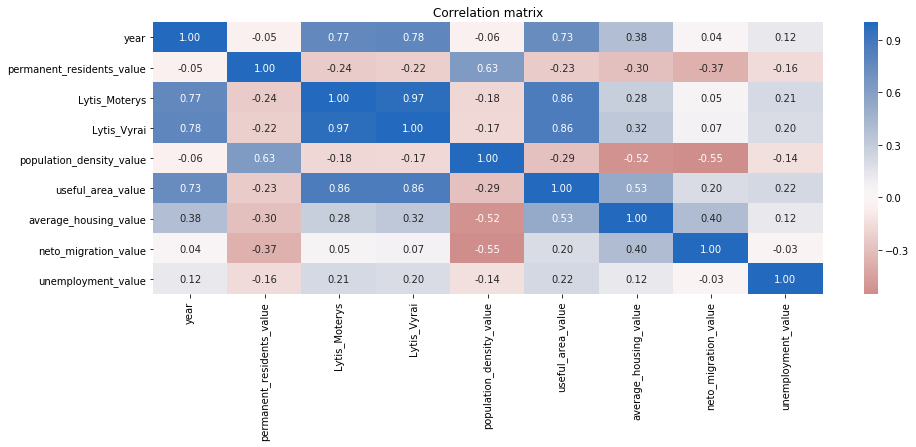

In [26]:
plt.figure(figsize = [15, 5]) 
sb.heatmap(final.corr(), annot = True, fmt = '.2f', cmap = 'vlag_r', center = 0)
plt.title('Correlation matrix');